***problem Statement***: Create a dataset that will be used in a supervised machine learning model. 

***Requirements***: 
- 10 classes.
- 500 datapoints.
- algorithm wiht 80% accuracy.
  
***Intuitive solution:***

    Supervised learning means having a label for a dataset. Lets think abou it from a solution first idealogy. 

    What is the end point or a use case?

    Something like an image detection => color prediction based on region. 

    So, lets start with the image. We can take random region in an image and take the color as the label.
    It would make it computationally easier on our end. 

In [41]:
# required libraries
# use this command '!pip install opencv-python' or 'pip install opencv-python' if you don't have the library
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [42]:
# load and preprocess the image
file_loc = 'image.png'
image = cv2.imread(file_loc)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# apply blurr 
blurred = cv2.GaussianBlur(image_rgb, (7,7),3)

In [43]:
# define the classes
color_centers = {
    'Red':     np.array([255, 0, 0]),
    'Green':   np.array([0, 255, 0]),
    'Blue':    np.array([0, 0, 255]),
    'Yellow':  np.array([255, 255, 0]),
    'Cyan':    np.array([0, 255, 255]),
    'Magenta': np.array([255, 0, 255]),
    'Orange':  np.array([255, 165, 0])
}
color_name = list(color_centers.keys())
centers = np.stack(list(color_centers.values()), axis = 0) # shape is going to be (7,3)

In [44]:
# create the dataset from the image
pixels = blurred.reshape(-1,3)

def assign_label(pixel):
    distances = np.linalg.norm(centers - pixel, axis=1)
    label_index = np.argmin(distances)
    return label_index

# Vectorize labeling: assign a class (0 to 6) for each pixel.
labels = np.array([assign_label(pix) for pix in pixels])

In [45]:
# add noise to the feature
noise_std = 20  # standard deviation of noise
noisy_pixels = pixels + np.random.normal(0, noise_std, pixels.shape)
noisy_pixels = np.clip(noisy_pixels, 0, 255).astype(np.uint8)

Test Accuracy: 0.89


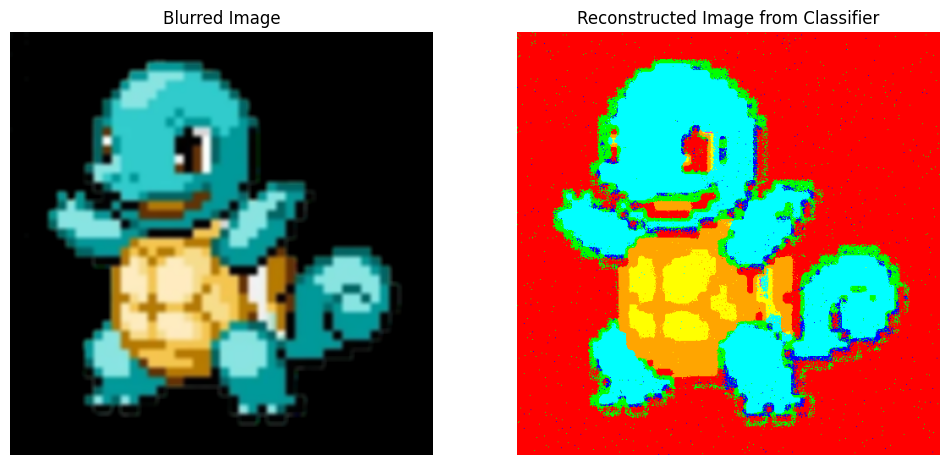

In [46]:
# Train a supervised classifier?
X = noisy_pixels
y = labels

# Split the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest classifier.
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate the classifier.
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

# -----------------------
# 6. Use the model to reconstruct the image
# -----------------------
# Predict the label for every (noisy) pixel.
predicted_labels = clf.predict(noisy_pixels)
# Map each label back to its representative color (the color center).
reconstructed_pixels = np.array([centers[label] for label in predicted_labels], dtype=np.uint8)
# Reshape back to the original image shape.
reconstructed_image = reconstructed_pixels.reshape(blurred.shape)

# -----------------------
# 7. Visualize the results
# -----------------------
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(blurred)
plt.title("Blurred Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image)
plt.title("Reconstructed Image from Classifier")
plt.axis('off')

plt.show()

In [47]:
df = pd.DataFrame(noisy_pixels, columns = ['R','G', 'B'])
df['label'] = labels
print(df.head())

    R   G   B  label
0   4  23   0      1
1  27   0   4      1
2   0   0   0      1
3   0   0  22      1
4   0  20   0      0


In [48]:
df['color'] = df['label'].apply(lambda x: color_name[x])

In [49]:
df.head()

,R,G,B,label,color
0,4,23,0,1,Green
1,27,0,4,1,Green
2,0,0,0,1,Green
3,0,0,22,1,Green
4,0,20,0,0,Red


In [50]:
help(cv2.GaussianBlur)

Help on built-in function GaussianBlur:

GaussianBlur(...)
    GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType[, hint]]]]) -> dst
    .   @brief Blurs an image using a Gaussian filter.
    .
    .   The function convolves the source image with the specified Gaussian kernel. In-place filtering is
    .   supported.
    .
    .   @param src input image; the image can have any number of channels, which are processed
    .   independently, but the depth should be CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
    .   @param dst output image of the same size and type as src.
    .   @param ksize Gaussian kernel size. ksize.width and ksize.height can differ but they both must be
    .   positive and odd. Or, they can be zero's and then they are computed from sigma.
    .   @param sigmaX Gaussian kernel standard deviation in X direction.
    .   @param sigmaY Gaussian kernel standard deviation in Y direction; if sigmaY is zero, it is set to be
    .   equal to sigmaX, if both sigmas are

Final DataFrame head:
   x  y  label
0  0  0      1
1  1  0      1
2  2  0      1
3  3  0      0
4  4  0      0
Test Accuracy (using x, y as features): 0.99


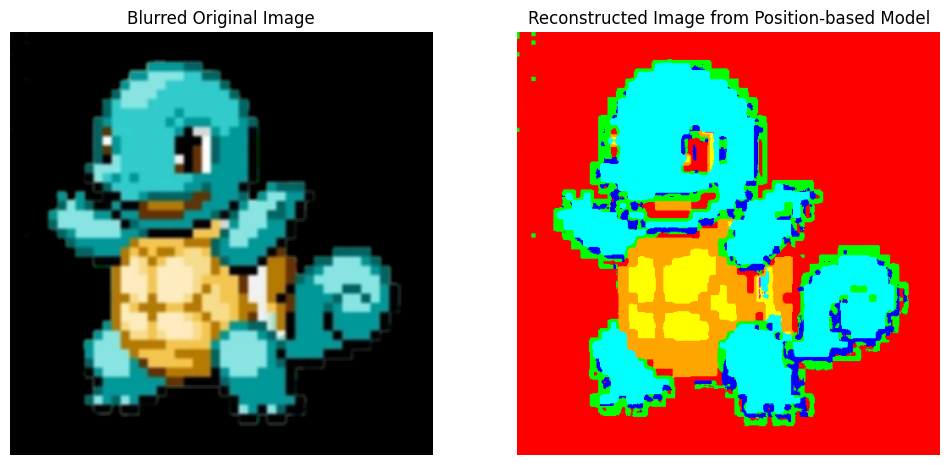

In [51]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# -----------------------
# 1. Load and preprocess the image
# -----------------------
# Replace 'path_to_image.jpg' with the path to your image file.
image = cv2.imread(file_loc)
if image is None:
    raise ValueError("Image not found. Check your 'path_to_image.jpg' path.")

# Convert image from BGR (OpenCV default) to RGB.
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply Gaussian blur to smooth out details.
blurred = cv2.GaussianBlur(image_rgb, (5, 5), 3)

# Get image dimensions.
height, width, _ = blurred.shape

# -----------------------
# 2. Define 7 color centers (our classes)
# -----------------------
color_centers = {
    'Red':     np.array([255, 0, 0]),
    'Green':   np.array([0, 255, 0]),
    'Blue':    np.array([0, 0, 255]),
    'Yellow':  np.array([255, 255, 0]),
    'Cyan':    np.array([0, 255, 255]),
    'Magenta': np.array([255, 0, 255]),
    'Orange':  np.array([255, 165, 0])
}
color_names = list(color_centers.keys())
centers = np.stack(list(color_centers.values()), axis=0)  # shape: (7, 3)

# -----------------------
# 3. Create the dataset from the image
# -----------------------
# Flatten the image: each row is a pixel's RGB value.
pixels = blurred.reshape(-1, 3)

# Compute pixel positions based on row-major order.
indices = np.arange(pixels.shape[0])
x_coords = indices % width
y_coords = indices // width

# Function to assign a label based on the nearest color center (Euclidean distance)
def assign_label(pixel):
    distances = np.linalg.norm(centers - pixel, axis=1)
    return np.argmin(distances)

# Assign a class (0 to 6) for each pixel.
labels = np.array([assign_label(pix) for pix in pixels])

# -----------------------
# 4. Create the final DataFrame (with only x, y, and label)
# -----------------------
# Here, we intentionally exclude the R, G, B values from the training data.
df = pd.DataFrame({
    'x': x_coords,
    'y': y_coords,
    'label': labels
})

print("Final DataFrame head:")
print(df.head())

# -----------------------
# 5. Train a classifier using pixel positions to predict the pixel color label
# -----------------------
# Our features are the pixel positions (x, y)
X = df[['x', 'y']]
y = df['label']

# Split the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest classifier.
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate the classifier.
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy (using x, y as features): {accuracy:.2f}")

# -----------------------
# 6. Reconstruct the image using the classifier's predictions based on pixel positions
# -----------------------
# Predict the label for every pixel using its (x, y) position.
predicted_labels = clf.predict(df[['x', 'y']])

# Map each predicted label back to its representative RGB color.
reconstructed_pixels = np.array([centers[label] for label in predicted_labels], dtype=np.uint8)
reconstructed_image = reconstructed_pixels.reshape(blurred.shape)

# -----------------------
# 7. Visualize the results
# -----------------------
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(blurred)
plt.title("Blurred Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image)
plt.title("Reconstructed Image from Position-based Model")
plt.axis('off')

plt.show()


In [52]:
df.shape

(250000, 3)

In [53]:
from sklearn.neighbors import KNeighborsClassifier
# Our features are the pixel positions.
X = df[['x', 'y']]
y = df['label']

# Split the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a KNN classifier (with k=5; adjust if needed).
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Evaluate the classifier.
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy using KNN (with x, y as features): {accuracy:.2f}")

Test Accuracy using KNN (with x, y as features): 0.98


In [54]:
noise_rate = 0.17
noisy_labels = []

for label in df["label"].values:
    if np.random.rand() < noise_rate:
        possible_labels = [i for i in range(len(color_names)) if i!=label]
        noisy_label = np.random.choice(possible_labels)
        noisy_labels.append(noisy_label)
    else:
        noisy_labels.append(label)
    
noisy_labels = np.array(noisy_labels)


In [55]:
df['label'] = noisy_labels

In [56]:
from sklearn.neighbors import KNeighborsClassifier
# Our features are the pixel positions.
X = df[['x', 'y']]
y = df['label']

# Split the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a KNN classifier (with k=5; adjust if needed).
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Evaluate the classifier.
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy using KNN (with x, y as features): {accuracy:.2f}")

Test Accuracy using KNN (with x, y as features): 0.80


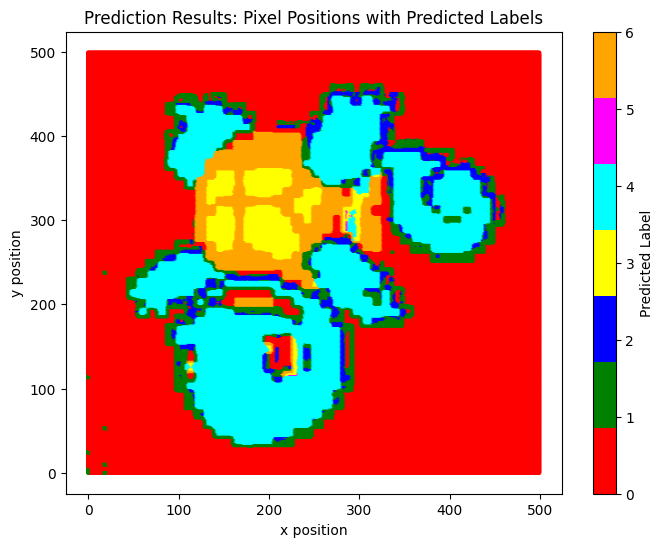

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Assume df is your DataFrame with 'x', 'y', and you have predicted labels in an array called predicted_labels.
# For demonstration, we'll add predicted_labels to the DataFrame.
df['predicted_label'] = predicted_labels

# Create a discrete colormap for our 7 classes.
# Ensure that the color names match the ones used when creating the dataset.
cmap = ListedColormap(['red', 'green', 'blue', 'yellow', 'cyan', 'magenta', 'orange'])

plt.figure(figsize=(8, 6))
plt.scatter(df['x'], df['y'], c=df['predicted_label'], cmap=cmap, s=5)
plt.xlabel('x position')
plt.ylabel('y position')
plt.title('Prediction Results: Pixel Positions with Predicted Labels')
plt.colorbar(ticks=range(7), label='Predicted Label')
plt.show()


In [58]:
df.head()

,x,y,label,predicted_label
0,0,0,1,1
1,1,0,1,1
2,2,0,1,1
3,3,0,0,0
4,4,0,4,0


---

In [60]:
# required libraries
# use this command '!pip install opencv-python' or 'pip install opencv-python' if you don't have the library
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [62]:
df = df.drop('predicted_label',axis=1)

In [65]:
df.to_csv('Supervised_data_set')